<a href="https://colab.research.google.com/github/Giuseppe0075/PyTorch-Learning/blob/main/02_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network Classification with PyTorch

## 0. Setup

In [139]:
import torch
# Agnostic device setting
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

# Constants
RANDOM_STATE = 42

cuda


## 1. Make classification data

In [140]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=RANDOM_STATE)

In [141]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label":y[:]})
circles

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


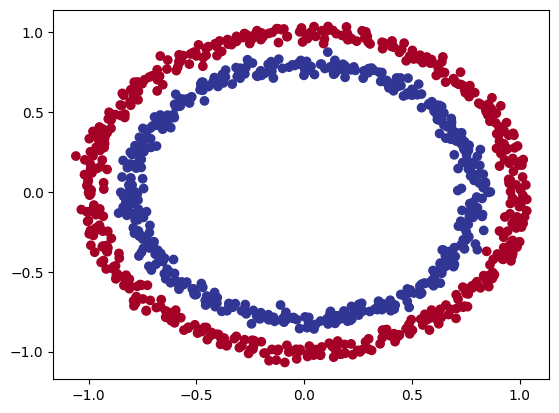

In [142]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu);

### 1.1 Check input and output shapes

In [143]:
X.shape, y.shape

((1000, 2), (1000,))

In [144]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values from one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes from one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values from one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes from one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [145]:
import torch

In [146]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [147]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=RANDOM_STATE)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Build the model

In [148]:
import torch
from torch import nn

In [149]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_2(self.layer_1(x))

In [150]:
torch.manual_seed(RANDOM_STATE)
model_0 = CircleModelV0().to(device)
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('layer_1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.2060], device='cuda:0'))])

In [151]:
torch.manual_seed(RANDOM_STATE)
# Replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('0.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('1.bias', tensor([-0.2060], device='cuda:0'))])

`nn.Sequential` is very useful to create simple neural networks, however implementing a `nn.Module` subclass gives you more power to create custom and complex ones.

In [152]:
# Make predictions with random numbers
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
  print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
  print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
  print(f"First 10 predictions: {untrained_preds[:10]}")
  print(f"First 10 labels: {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])
First 10 predictions: tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]], device='cuda:0')
First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Define loss and optimizer functions

In [153]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)
loss_fn, optimizer

(BCEWithLogitsLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     decoupled_weight_decay: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     weight_decay: 0
 ))

In [154]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 3. Train & Test loop
We need to use sigmoid to trasform activation function to prediction probabilities, and then we need to transform probabilities into the labels (`0/1`)

In [155]:
torch.manual_seed(RANDOM_STATE)
torch.cuda.manual_seed(RANDOM_STATE)

# Set number of epoches
epochs = 1000

# Set dataset's splits to device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

# Save historyc data
epoch_count = []
train_loss_data = []
test_loss_data = []
accuracy_data = []

for epoch in range(epochs):
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss
  train_loss = loss_fn(y_logits, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Back propagation
  train_loss.backward()

  # 5. Optimizer step
  optimizer.step()

  model_0.eval()

  with torch.inference_mode():
    y_test_logits = model_0(X_test).squeeze()
    y_test_preds = torch.round(torch.sigmoid(y_test_logits))
    test_loss = loss_fn(y_test_logits, y_test)
    accuracy = accuracy_fn(y_test, y_test_preds)

    if epoch % 100 == 0:
      epoch_count.append(epoch)
      train_loss_data.append(train_loss.detach().cpu().numpy())
      test_loss_data.append(test_loss.detach().cpu().numpy())
      accuracy_data.append(accuracy)
      print(f"Epoch: {epoch}, Train Loss: {train_loss}, Test Loss: {test_loss}, Accuracy: {accuracy}")

Epoch: 0, Train Loss: 0.6956853866577148, Test Loss: 0.6972896456718445, Accuracy: 50.0
Epoch: 100, Train Loss: 0.6929800510406494, Test Loss: 0.6946759819984436, Accuracy: 45.0
Epoch: 200, Train Loss: 0.6929798722267151, Test Loss: 0.6946795582771301, Accuracy: 46.0
Epoch: 300, Train Loss: 0.6929798722267151, Test Loss: 0.6946795582771301, Accuracy: 46.0
Epoch: 400, Train Loss: 0.6929798722267151, Test Loss: 0.6946795582771301, Accuracy: 46.0
Epoch: 500, Train Loss: 0.6929798722267151, Test Loss: 0.6946795582771301, Accuracy: 46.0
Epoch: 600, Train Loss: 0.6929798722267151, Test Loss: 0.6946795582771301, Accuracy: 46.0
Epoch: 700, Train Loss: 0.6929798722267151, Test Loss: 0.6946795582771301, Accuracy: 46.0
Epoch: 800, Train Loss: 0.6929798722267151, Test Loss: 0.6946795582771301, Accuracy: 46.0
Epoch: 900, Train Loss: 0.6929798722267151, Test Loss: 0.6946795582771301, Accuracy: 46.0


# 4. Visualize

In [38]:
import requests
from pathlib import Path

# Download helper function from the course repo
if Path("helper_functions.py").is_file():
  print('helper_functions.py already installed')
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already installed


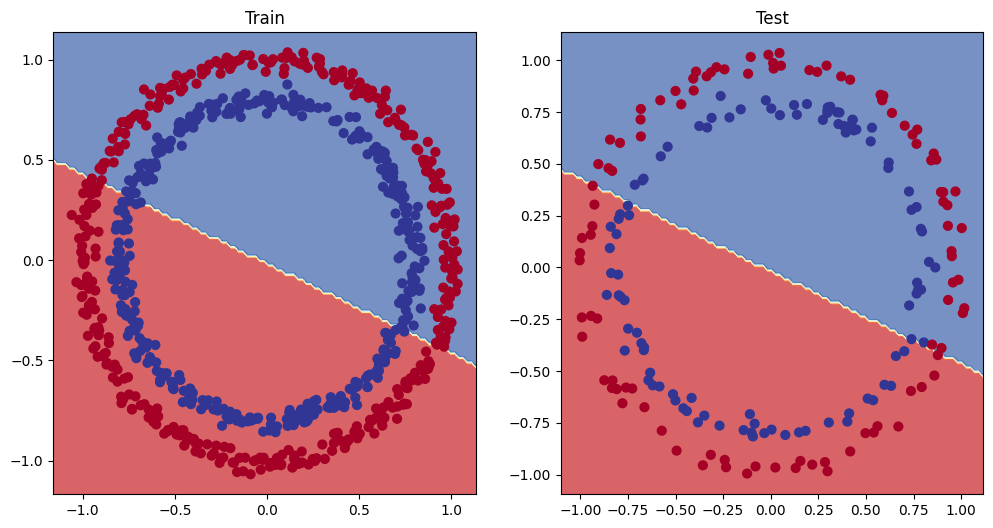

In [157]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)
plt.show()

## 5. Improve our model
Ways to improve a model:
* Add more layers
* Add more hidden units
* Fit longer
* Change the activation functions
* Change the learning rate
* Change the loss function

In [158]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [159]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

In [160]:
torch.manual_seed(RANDOM_STATE)
torch.cuda.manual_seed(RANDOM_STATE)

epochs = 1000

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_preds)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)
    if epoch % 100 == 0:
      print(f"Epoch: {epoch}, Train Loss: {loss}, Test Loss: {test_loss}, Train Accuracy: {acc}, Test Accuracy: {test_acc}")

Epoch: 0, Train Loss: 0.6939550638198853, Test Loss: 0.6926422119140625, Train Accuracy: 50.875, Test Accuracy: 50.0
Epoch: 100, Train Loss: 0.6929798722267151, Test Loss: 0.6946640014648438, Train Accuracy: 51.125, Test Accuracy: 45.5
Epoch: 200, Train Loss: 0.6929798722267151, Test Loss: 0.6946796178817749, Train Accuracy: 51.0, Test Accuracy: 46.0
Epoch: 300, Train Loss: 0.6929798722267151, Test Loss: 0.6946795582771301, Train Accuracy: 51.0, Test Accuracy: 46.0
Epoch: 400, Train Loss: 0.6929798722267151, Test Loss: 0.6946795582771301, Train Accuracy: 51.0, Test Accuracy: 46.0
Epoch: 500, Train Loss: 0.6929798722267151, Test Loss: 0.6946795582771301, Train Accuracy: 51.0, Test Accuracy: 46.0
Epoch: 600, Train Loss: 0.6929798722267151, Test Loss: 0.6946795582771301, Train Accuracy: 51.0, Test Accuracy: 46.0
Epoch: 700, Train Loss: 0.6929798722267151, Test Loss: 0.6946795582771301, Train Accuracy: 51.0, Test Accuracy: 46.0
Epoch: 800, Train Loss: 0.6929798722267151, Test Loss: 0.69467

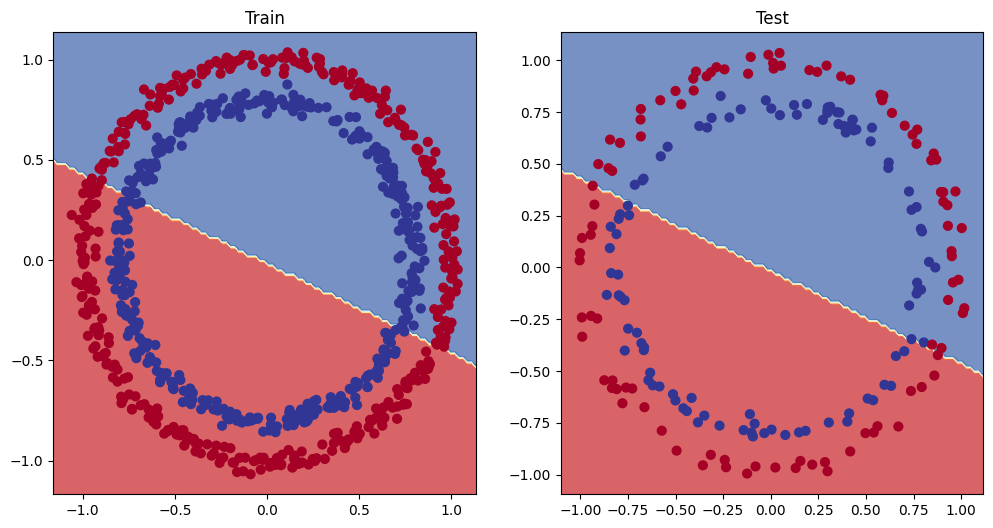

In [161]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)
plt.show()

## 6. Actually, we need to use some non-linear layers...

### 6.1 Recreating non linear data

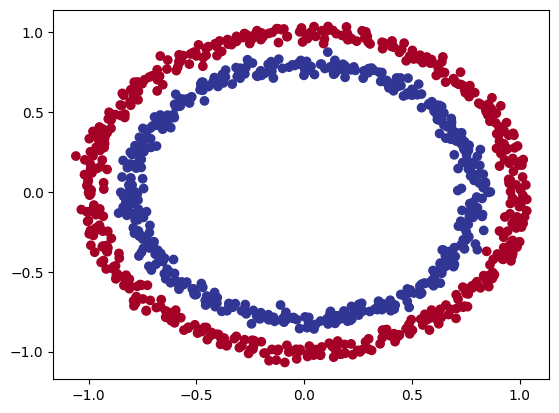

In [162]:
#Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=RANDOM_STATE)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [163]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=RANDOM_STATE)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

torch.Size([800, 2]) torch.Size([200, 2]) torch.Size([800]) torch.Size([200])


### 6.2 Build a model with non-linear layers

In [164]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

    # non-linear activation layer
    self.relu = nn.ReLU()
    self.elu = nn.ReLU6()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
  (elu): ReLU6()
)

In [165]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_3.parameters(),
                             lr=0.01)

In [166]:
# Train & Fit
epochs = 1000

X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

for epoch in range(epochs):
  model_3.train()
  y_logits = model_3(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  train_loss = loss_fn(y_logits, y_train)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    y_test_logits = model_3(X_test).squeeze()
    y_test_preds = torch.round(torch.sigmoid(y_test_logits))
    test_loss = loss_fn(y_test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=y_test_preds)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch}, Train loss: {train_loss:.5f}, Test loss: {test_loss:5f}, Acc: {test_acc}")

Epoch: 0, Train loss: 0.69295, Test loss: 0.692030, Acc: 55.50000000000001
Epoch: 100, Train loss: 0.17334, Test loss: 0.206838, Acc: 99.0
Epoch: 200, Train loss: 0.01503, Test loss: 0.027433, Acc: 100.0
Epoch: 300, Train loss: 0.00581, Test loss: 0.014807, Acc: 100.0
Epoch: 400, Train loss: 0.00317, Test loss: 0.010654, Acc: 100.0
Epoch: 500, Train loss: 0.00200, Test loss: 0.008737, Acc: 100.0
Epoch: 600, Train loss: 0.00138, Test loss: 0.007544, Acc: 100.0
Epoch: 700, Train loss: 0.00101, Test loss: 0.006769, Acc: 100.0
Epoch: 800, Train loss: 0.00076, Test loss: 0.006217, Acc: 100.0
Epoch: 900, Train loss: 0.00060, Test loss: 0.005794, Acc: 100.0


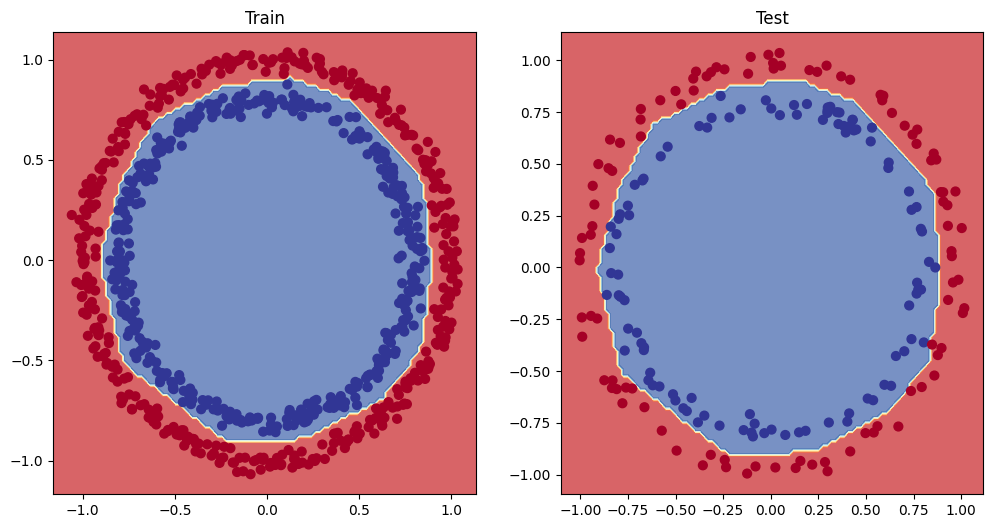

In [167]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)
plt.show()

Wow it works!!!

## 7. Replicating non-linear activation functions

In [168]:
# Create a tensor
A = torch.arange(-10, 10, 0.01, dtype=torch.float32)
A.dtype

torch.float32

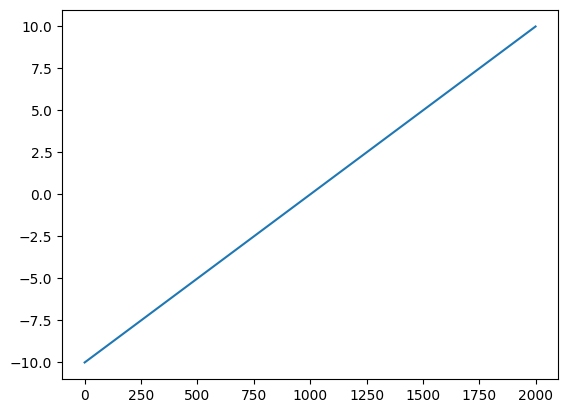

In [169]:
# Visualize these data
plt.plot(A)

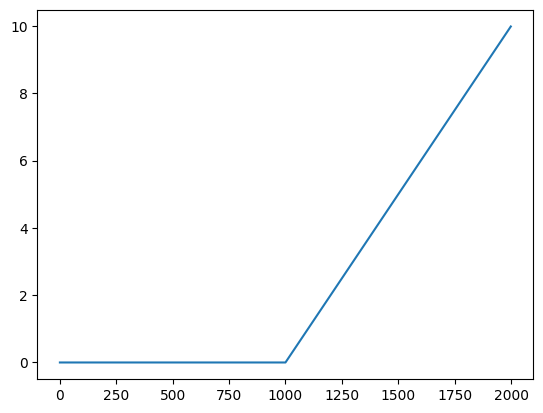

In [170]:
plt.plot(torch.relu(A))

In [171]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

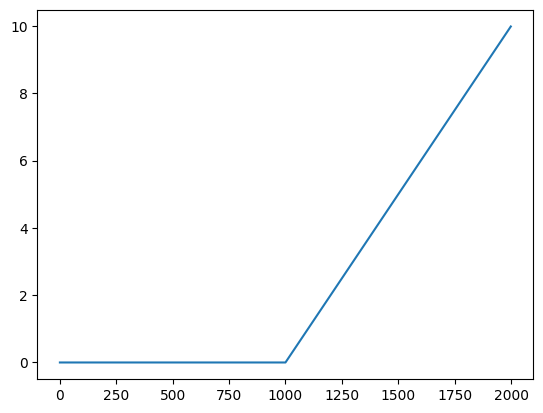

In [172]:
plt.plot(relu(A))

In [173]:
# Now let's do the same for sigmoid
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))
sigmoid(A)

tensor([4.5398e-05, 4.5854e-05, 4.6315e-05,  ..., 9.9995e-01, 9.9995e-01,
        9.9995e-01])

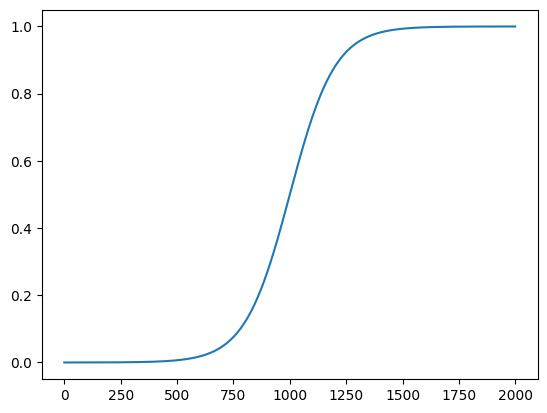

In [174]:
plt.plot(sigmoid(A))

In [175]:
torch.exp(A)

tensor([4.5400e-05, 4.5856e-05, 4.6317e-05,  ..., 2.1375e+04, 2.1590e+04,
        2.1807e+04])

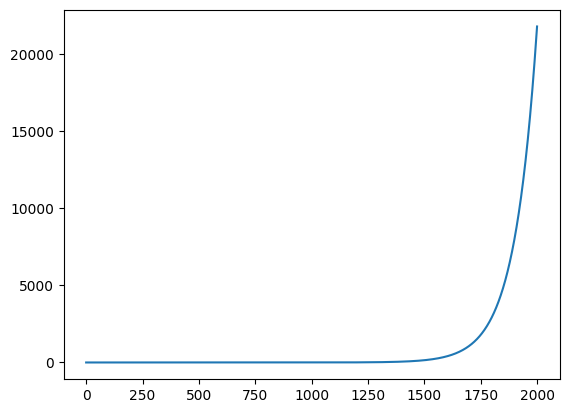

In [176]:
plt.plot(torch.exp(A))

## 8. Putting it all togheter creating a multi-class classification problem

### 8.1 Creating a toy multi-class dataset

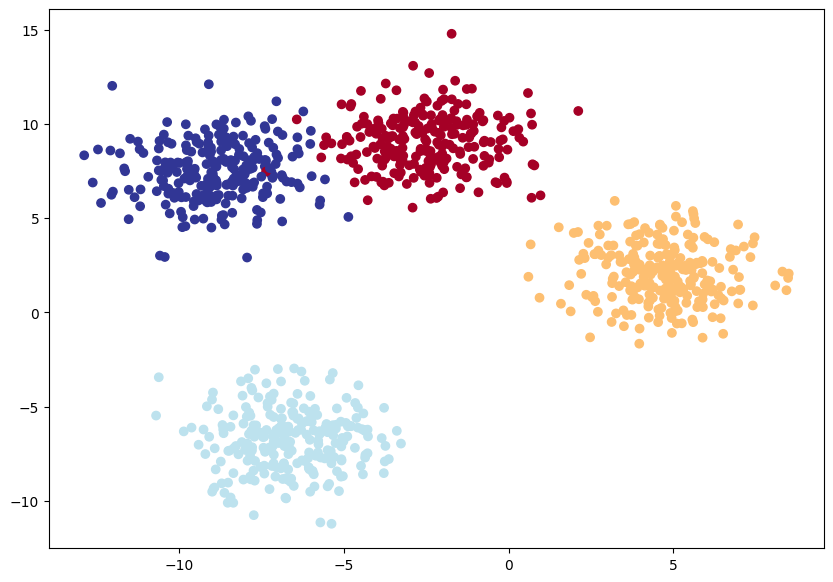

In [79]:
# Import dependecies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                           n_features=NUM_FEATURES,
                           centers=NUM_CLASSES,
                           cluster_std=1.5,
                           random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)
# 4. Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Building a multi-class classification model in PyTorch

In [80]:
# Create device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [87]:
from torch import nn
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

class BlobModel(nn.Module):
  def __init__(self, input_features:int, output_features:int, hidden_units=8):
    super().__init__()

    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)

    )
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)

In [88]:
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
  (relu): ReLU()
)

### 8.3 Creating loss and optimizer

In [89]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                             lr=0.1)

In [90]:
model_4.eval()
print(X_blob_test.device)
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))
  y_preds = torch.softmax(y_logits, dim=1)

print(y_logits[:10])

cuda:0
tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]], device='cuda:0')


### 8.4 Training & Testing loop

In [91]:
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

epochs = 1000

X_blob_train, X_blob_test = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_4.eval()

  with torch.inference_mode():
    y_test_logits = model_4(X_blob_test)
    y_test_preds = torch.softmax(y_test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(y_test_logits, y_blob_test)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch}, Loss: {loss}, Test loss: {test_loss}")


Epoch: 0, Loss: 1.0432369709014893, Test loss: 0.5786146521568298
Epoch: 100, Loss: 0.031848687678575516, Test loss: 0.022926397621631622
Epoch: 200, Loss: 0.027066202834248543, Test loss: 0.017038244754076004
Epoch: 300, Loss: 0.025644632056355476, Test loss: 0.014989937655627728
Epoch: 400, Loss: 0.024923060089349747, Test loss: 0.013892702758312225
Epoch: 500, Loss: 0.02444371208548546, Test loss: 0.013177364133298397
Epoch: 600, Loss: 0.024074530228972435, Test loss: 0.012653776444494724
Epoch: 700, Loss: 0.023765582591295242, Test loss: 0.012240217067301273
Epoch: 800, Loss: 0.023494184017181396, Test loss: 0.011896040290594101
Epoch: 900, Loss: 0.023248545825481415, Test loss: 0.011598779819905758


### 8.5 Visualize

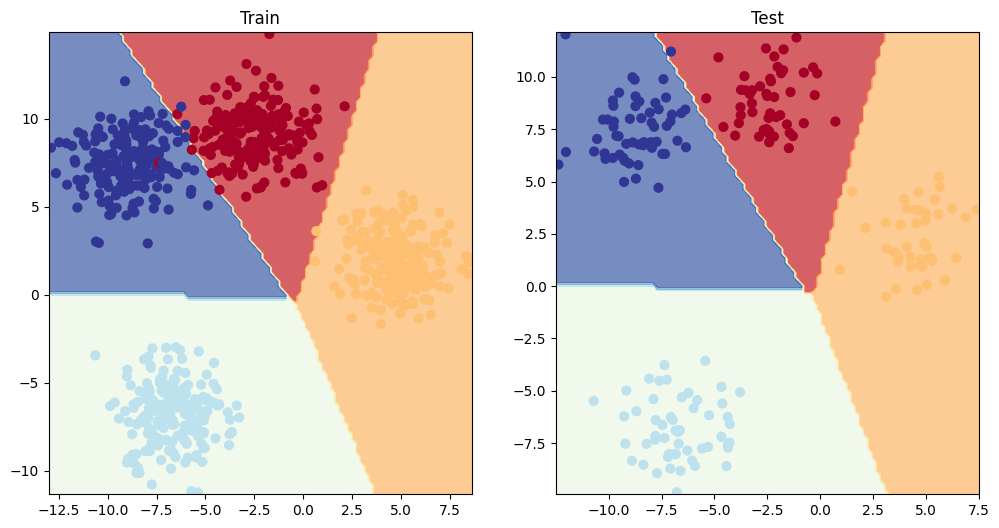

In [92]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)
plt.show()